In [1]:
import mxnet as mx
import matplotlib.pyplot as plt
import gluoncv as gcv

In [2]:
image_url='https://image.shutterstock.com/image-photo/family-two-person-dog-embrace-600w-644265589.jpg'
image_filepath='family-two-person-dog-embrace-600w-644265589.jpg'
gcv.utils.download(url=image_url,path=image_filepath)

52KB [00:00, 648.69KB/s]              


'family-two-person-dog-embrace-600w-644265589.jpg'

In [10]:
image=mx.image.imread(image_filepath)
print(image.shape)

(420, 600, 3)


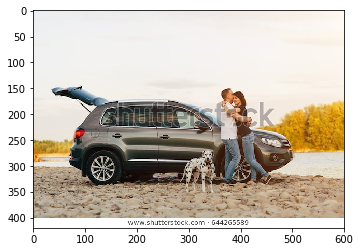

In [8]:
plt.imshow(image.asnumpy())

In [11]:
image,chw_image=gcv.data.transforms.presets.yolo.transform_test(image,short=512)
print('shape',image.shape)

shape (1, 3, 512, 731)


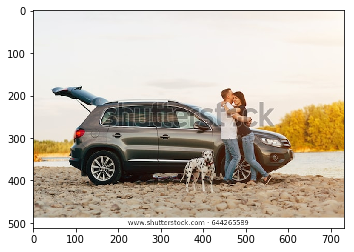

In [12]:
plt.imshow(chw_image)

In [13]:
network=gcv.model_zoo.get_model('yolo3_darknet53_coco',pretrained=True)

100%|██████████| 224190/224190 [00:02<00:00, 76476.83KB/s]


In [14]:
prediction=network(image)

In [15]:
prediction=[array[0] for array in prediction]

In [ ]:
prediction.shape

In [16]:
class_indicies,probabilities,bounding_boxes=prediction

In [17]:
k=10
print(class_indicies[:k])


[[16.]
 [ 0.]
 [ 2.]
 [ 0.]
 [23.]
 [65.]
 [65.]
 [65.]
 [ 2.]
 [ 7.]]
<NDArray 10x1 @cpu(0)>


In [18]:
class_index=16
assert class_index>-1
print(network.classes[class_index])

dog


In [19]:
print(probabilities[:k])


[[0.88395613]
 [0.87878406]
 [0.8224639 ]
 [0.34936   ]
 [0.2799377 ]
 [0.12891714]
 [0.11395821]
 [0.03415999]
 [0.03382878]
 [0.03227973]]
<NDArray 10x1 @cpu(0)>


In [20]:
print(bounding_boxes[:k])


[[348.34363 327.11676 428.6306  432.48297]
 [449.01443 190.92783 554.57605 406.64944]
 [ 73.49509 204.01913 460.92386 406.48495]
 [428.59338 183.93567 489.88306 408.41577]
 [336.79422 332.56726 425.73196 428.05048]
 [446.71707 217.63266 454.61813 225.26248]
 [447.61142 216.94035 473.48532 234.44737]
 [443.88678 215.72932 449.9803  224.30476]
 [449.01443 190.92783 554.57605 406.64944]
 [103.19614 200.91766 617.18005 416.7384 ]]
<NDArray 10x4 @cpu(0)>


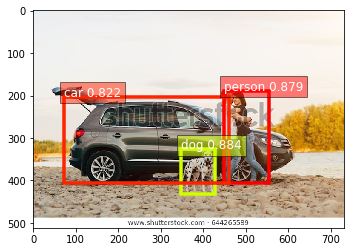

In [22]:
gcv.utils.viz.plot_bbox(chw_image,
                        bounding_boxes,
                        probabilities,
                        class_indicies,
                        class_names=network.classes
                       )